## ANL252 ECA

### Question 1

The categorial variables are ID, gender, education, martial, age and rating.

The numeric variables are limit, balance, income, S(n), B(n) and R(n).


### Question 2

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import statistics as sts

In [2]:
#!conda install -c anaconda xlrd

In [3]:
df_credit = pd.read_csv('ECA_data.csv')
print (df_credit)

          ID   LIMIT    BALANCE  INCOME  RATING  GENDER  EDUCATION  MARITAL  \
0          1  210000      0.000  235822       1       1        1.0      2.0   
1          2  260000  10928.050  278481       0       0        2.0      2.0   
2          3  400000  65397.850  431993       0       0        3.0      1.0   
3          4   20000   3695.300   22368       0       0        2.0      1.0   
4          5  180000     68.250  166900       0       1        2.0      1.0   
...      ...     ...        ...     ...     ...     ...        ...      ...   
18754  18762  220000  33065.900  225862       0       0        3.0      1.0   
18755  18763  150000    294.525  149966       0       0        3.0      2.0   
18756  18764   30000    623.875   30327       1       0        2.0      2.0   
18757  18765   80000      0.000   94607       1       0        3.0      1.0   
18758  18766   50000   8387.575   40267       1       0        2.0      1.0   

       AGE  S1  ...      B1      B2      B3      B4

In [4]:
df_credit.head(18769)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18754,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18755,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18756,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18757,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18759 entries, 0 to 18758
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18759 non-null  int64  
 1   LIMIT      18759 non-null  int64  
 2   BALANCE    18759 non-null  float64
 3   INCOME     18759 non-null  int64  
 4   RATING     18759 non-null  int64  
 5   GENDER     18759 non-null  int64  
 6   EDUCATION  18746 non-null  float64
 7   MARITAL    18721 non-null  float64
 8   AGE        18759 non-null  int64  
 9   S1         18759 non-null  int64  
 10  S2         18759 non-null  int64  
 11  S3         18759 non-null  int64  
 12  S4         18759 non-null  int64  
 13  S5         18759 non-null  int64  
 14  B1         18759 non-null  int64  
 15  B2         18759 non-null  int64  
 16  B3         18759 non-null  int64  
 17  B4         18759 non-null  int64  
 18  B5         18759 non-null  int64  
 19  R1         18759 non-null  int64  
 20  R2    

In [6]:
df_credit.columns.values 

array(['ID', 'LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER',
       'EDUCATION', 'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5'], dtype=object)

In [7]:
df_credit.index.values

array([    0,     1,     2, ..., 18756, 18757, 18758], dtype=int64)

In [8]:
print(type(df_credit.columns))
print(type(df_credit.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [9]:
df_credit.columns.tolist()
df_credit.index.tolist()

print (type(df_credit.columns.tolist()))
print (type(df_credit.index.tolist()))

<class 'list'>
<class 'list'>


In [10]:
# size of dataframe (rows, columns)
df_credit.shape  

(18759, 24)

In [11]:
#df_credit.drop([531,660,1613])
#df_credit.drop([4238,7829,15354,1807,18161,18162,18278])
df_credit.head(18769)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18754,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18755,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18756,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18757,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [12]:
df_credit.describe()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,S5,B1,B2,B3,B4,B5,R1,R2,R4,R5
count,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18746.000000,18721.000000,18759.000000,18759.000000,...,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,1.875900e+04,18759.000000,18759.000000,18759.000000
mean,9381.564422,168300.745242,9121.571234,177794.613839,0.219361,0.618423,1.789982,1.514930,35.544805,0.128685,...,0.038648,49994.467509,48175.841623,45030.851165,41069.926489,39636.619809,6.028522e+03,5653.745562,4765.958207,5187.753931
std,5416.753531,129406.902201,13045.989497,143092.198071,0.413825,0.485787,0.732296,0.519599,9.159525,0.954765,...,0.849822,71928.956360,70318.472990,66104.017269,61708.421613,59923.594495,2.290477e+04,18619.512528,15035.026737,17428.412339
min,1.000000,10000.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,21.000000,-1.000000,...,-1.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4691.500000,50000.000000,640.237500,56535.500000,0.000000,0.000000,1.000000,1.000000,28.000000,0.000000,...,0.000000,3088.500000,2858.000000,2514.500000,1951.000000,1431.500000,1.000000e+03,580.000000,286.000000,215.500000
50%,9382.000000,140000.000000,3960.950000,148226.000000,0.000000,1.000000,2.000000,2.000000,34.000000,0.000000,...,0.000000,21399.000000,20424.000000,19503.000000,18362.000000,17420.000000,2.133000e+03,2000.000000,1510.000000,1548.000000
75%,14071.500000,240000.000000,11977.262500,256900.000000,0.000000,1.000000,2.000000,2.000000,41.000000,0.000000,...,0.000000,65174.000000,61949.000000,57704.000000,50778.000000,49837.500000,5.002000e+03,5000.000000,4072.500000,4099.000000
max,18766.000000,800000.000000,130692.450000,908846.000000,1.000000,1.000000,3.000000,2.000000,80.000000,7.000000,...,7.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,426529.000000,527143.000000


Please clean the data set by removing the following unnecessary columns:

'ID', 'EDUCATION'

In [13]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_credit.drop(['ID','EDUCATION'], axis=1, inplace=True)
df_credit.head(18769)

,LIMIT,BALANCE,INCOME,RATING,GENDER,MARITAL,AGE,S1,S2,S3,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,210000,0.000,235822,1,1,2.0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,260000,10928.050,278481,0,0,2.0,31,0,0,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,400000,65397.850,431993,0,0,1.0,51,0,0,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,20000,3695.300,22368,0,0,1.0,58,-1,2,2,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,180000,68.250,166900,0,1,1.0,42,0,0,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18754,220000,33065.900,225862,0,0,1.0,39,0,0,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18755,150000,294.525,149966,0,0,2.0,43,-1,-1,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18756,30000,623.875,30327,1,0,2.0,37,3,2,-1,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18757,80000,0.000,94607,1,0,1.0,41,-1,0,0,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [14]:
df_credit.isnull().sum()

LIMIT       0
BALANCE     0
INCOME      0
RATING      0
GENDER      0
MARITAL    38
AGE         0
S1          0
S2          0
S3          0
S4          0
S5          0
B1          0
B2          0
B3          0
B4          0
B5          0
R1          0
R2          0
R3          0
R4          0
R5          0
dtype: int64

In [15]:
print (df_credit.dtypes)

LIMIT        int64
BALANCE    float64
INCOME       int64
RATING       int64
GENDER       int64
MARITAL    float64
AGE          int64
S1           int64
S2           int64
S3           int64
S4           int64
S5           int64
B1           int64
B2           int64
B3           int64
B4           int64
B5           int64
R1           int64
R2           int64
R3          object
R4           int64
R5           int64
dtype: object


In [16]:
df_credit['MARITAL'] = df_credit['MARITAL'].astype(str)
df_credit['BALANCE'] = df_credit['BALANCE'].astype(int)
print (df_credit.dtypes)

LIMIT       int64
BALANCE     int32
INCOME      int64
RATING      int64
GENDER      int64
MARITAL    object
AGE         int64
S1          int64
S2          int64
S3          int64
S4          int64
S5          int64
B1          int64
B2          int64
B3          int64
B4          int64
B5          int64
R1          int64
R2          int64
R3         object
R4          int64
R5          int64
dtype: object


In [17]:
df_credit['MARITAL'] = df_credit['MARITAL'].replace(['2.0'],'Married')
df_credit['MARITAL'] = df_credit['MARITAL'].replace(['1.0'],'Single')

df_credit['MARITAL'].value_counts()

Married    9829
Single     8703
0.0         189
nan          38
Name: MARITAL, dtype: int64

In [18]:
df_credit['MARITAL'] = df_credit['MARITAL'].replace(['0.0'],'Married')
df_credit['MARITAL'] = df_credit['MARITAL'].replace(['nan'],'Married')
df_credit['MARITAL'].value_counts()

Married    10056
Single      8703
Name: MARITAL, dtype: int64

In [19]:
df_credit = df_credit.replace(['$2,620 '],'2620')
df_credit = df_credit.replace(['$6,000 '],'6000')
df_credit = df_credit.replace(['$2,200 '],'2200')
df_credit = df_credit.replace(['$390 '],'390')
df_credit = df_credit.replace(['$2,688 '],'2688')
df_credit = df_credit.replace(['$13,069 '],'13069')
df_credit = df_credit.replace(['$7,000 '],'7000')
df_credit = df_credit.replace(['$5,000 '],'5000')
df_credit = df_credit.replace(['$2,089 '],'2089')
df_credit = df_credit.replace(['$0 '],'0')


df_credit.head(18769)
df_credit['R3'] = df_credit['R3'].astype(int)
print (df_credit.dtypes)

LIMIT       int64
BALANCE     int32
INCOME      int64
RATING      int64
GENDER      int64
MARITAL    object
AGE         int64
S1          int64
S2          int64
S3          int64
S4          int64
S5          int64
B1          int64
B2          int64
B3          int64
B4          int64
B5          int64
R1          int64
R2          int64
R3          int32
R4          int64
R5          int64
dtype: object


In [20]:
df_credit['AGE']= df_credit['AGE'].replace(['-1 '],'nan')
df_credit['AGE'].fillna(df_credit['AGE'].value_counts().index[0]
              	,inplace = True)

In [21]:
from scipy import stats

In [22]:
q_credit = df_credit["AGE"].quantile(0.99)
df_credit[df_credit["AGE"] < q_credit]

,LIMIT,BALANCE,INCOME,RATING,GENDER,MARITAL,AGE,S1,S2,S3,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,210000,0,235822,1,1,Married,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,260000,10928,278481,0,0,Married,31,0,0,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,400000,65397,431993,0,0,Single,51,0,0,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,20000,3695,22368,0,0,Single,58,-1,2,2,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,180000,68,166900,0,1,Single,42,0,0,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18754,220000,33065,225862,0,0,Single,39,0,0,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18755,150000,294,149966,0,0,Married,43,-1,-1,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18756,30000,623,30327,1,0,Married,37,3,2,-1,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18757,80000,0,94607,1,0,Single,41,-1,0,0,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [23]:
q_low = df_credit["AGE"].quantile(0.01)
q_hi  = df_credit["AGE"].quantile(0.99)

df_creditfil = df_credit[(df_credit["AGE"] < q_hi) & (df_credit["AGE"] > q_low)]

In [24]:
#df_credit[((df_credit['AGE'] - df_credit['AGE'].mean()) / df_credit['AGE'].std()).abs() < 3]

In [25]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

### Question 3. 

In [26]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [27]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.1


In [28]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


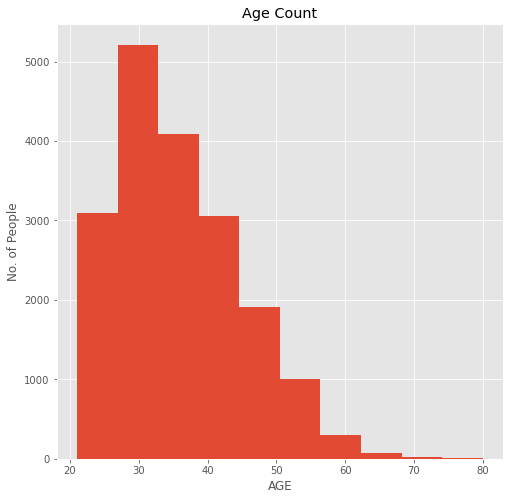

In [29]:
# generate histogram
df_credit.hist(column=['AGE'], figsize=(8, 8))

plt.title('Age Count')
plt.ylabel('No. of People')
plt.xlabel('AGE')

plt.show()

In [30]:
df_credit.describe()

,LIMIT,BALANCE,INCOME,RATING,GENDER,AGE,S1,S2,S3,S4,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
count,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,...,18759.000000,18759.000000,18759.000000,18759.000000,18759.000000,1.875900e+04,18759.000000,18759.000000,18759.000000,18759.000000
mean,168300.745242,9121.134495,177794.613839,0.219361,0.618423,35.544805,0.128685,0.111466,0.088811,0.040780,...,49994.467509,48175.841623,45030.851165,41069.926489,39636.619809,6.028522e+03,5653.745562,4937.867690,4765.958207,5187.753931
std,129406.902201,13045.958553,143092.198071,0.413825,0.485787,9.159525,0.954765,0.929832,0.922005,0.860384,...,71928.956360,70318.472990,66104.017269,61708.421613,59923.594495,2.290477e+04,18619.512528,16467.704459,15035.026737,17428.412339
min,10000.000000,0.000000,10000.000000,0.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,640.000000,56535.500000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,3088.500000,2858.000000,2514.500000,1951.000000,1431.500000,1.000000e+03,580.000000,316.000000,286.000000,215.500000
50%,140000.000000,3960.000000,148226.000000,0.000000,1.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,21399.000000,20424.000000,19503.000000,18362.000000,17420.000000,2.133000e+03,2000.000000,1500.000000,1510.000000,1548.000000
75%,240000.000000,11976.500000,256900.000000,0.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,65174.000000,61949.000000,57704.000000,50778.000000,49837.500000,5.002000e+03,5000.000000,4069.000000,4072.500000,4099.000000
max,800000.000000,130692.000000,908846.000000,1.000000,1.000000,80.000000,7.000000,8.000000,7.000000,7.000000,...,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,527143.000000


count     18759.000000
mean     177794.613839
std      143092.198071
min       10000.000000
25%       56535.500000
50%      148226.000000
75%      256900.000000
max      908846.000000
Name: INCOME, dtype: float64

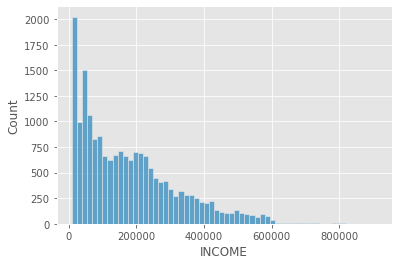

In [47]:
sns.histplot(data=df_credit,x="INCOME")
df_credit['INCOME'].describe()

Text(0.5, 0, 'Marital Status')

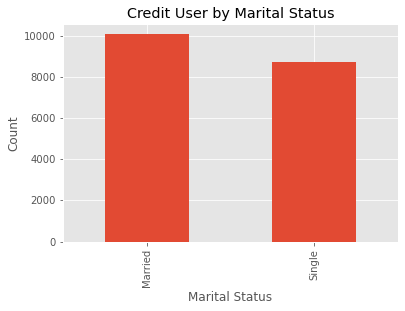

In [32]:
df_credit["MARITAL"].value_counts().plot.bar()
plt.title('Credit User by Marital Status')
plt.ylabel('Count')
plt.xlabel('Marital Status')

0    14644
1     4115
Name: RATING, dtype: int64

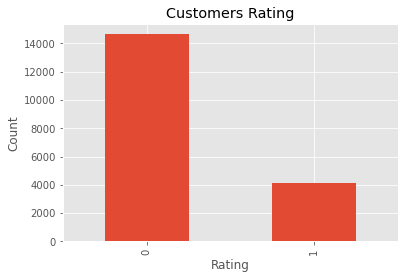

In [33]:
df_credit["RATING"].value_counts().plot.bar()
plt.title('Customers Rating')
plt.ylabel('Count')
plt.xlabel('Rating')
df_credit['RATING'].value_counts()

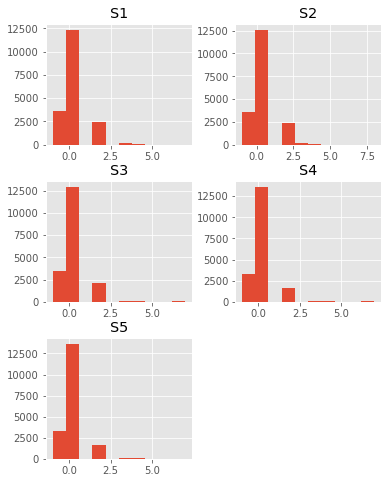

In [34]:
df_credit.hist(column=['S1', 'S2', 'S3','S4','S5'], figsize=(6, 8))

plt.title('Customer repayment status')
plt.ylabel('Count')
plt.xlabel('Month')

plt.show()

In [35]:
#Step 1: Prepare the data

#df_credit = df_credit[B1].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_credit.index = map(int, df_credit.index)

# let's label the index. This will automatically be the column name when we reset the index
#df_credit.index.name = 'B1'

# reset index to bring the Year in as a column
df_credit.reset_index(inplace=True)

# view the changes
df_credit.head()

,index,LIMIT,BALANCE,INCOME,RATING,GENDER,MARITAL,AGE,S1,S2,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,0,210000,0,235822,1,1,Married,30,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,260000,10928,278481,0,0,Married,31,0,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,2,400000,65397,431993,0,0,Single,51,0,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,3,20000,3695,22368,0,0,Single,58,-1,2,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,4,180000,68,166900,0,1,Single,42,0,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


### Question 4

In [36]:
x=df_credit.drop(["B1",'MARITAL'],axis=1).values
y=df_credit["B1"].values

In [37]:
print(x)
print(y)

[[     0 210000      0 ...      0      0      0]
 [     1 260000  10928 ...   2000   2000  72000]
 [     2 400000  65397 ...  11500   8000   7000]
 ...
 [ 18756  30000    623 ...   4200   2000   3100]
 [ 18757  80000      0 ...   1926  52964   1804]
 [ 18758  50000   8387 ...   1000   1000   1000]]
[     0  54074 343591 ...   3356  78379  48905]


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=ml.predict(x_test)
print(y_pred)

[41461.05859309  5158.00172551  1784.91673525 ... 14822.65672061
 48883.15573711 51833.15951873]


In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9485239044148921

### Scatter Plot

Text(0.5, 1.0, 'Actual vs Predicted')

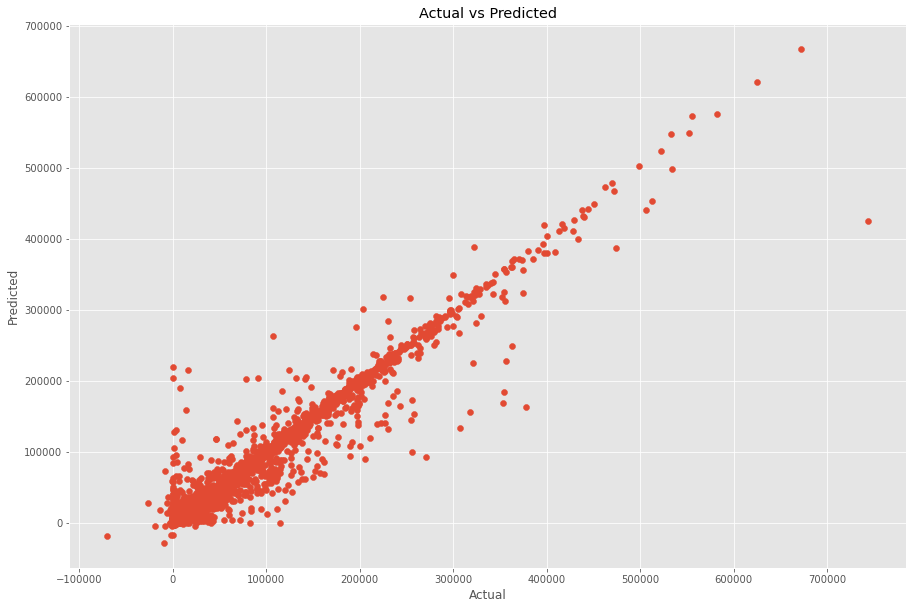

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


In [43]:
pred_y_df_credit=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df_credit[0:20]

,Actual Value,Predicted Value,Difference
0,40580,41461.058593,-881.058593
1,1684,5158.001726,-3474.001726
2,1995,1784.916735,210.083265
3,12493,14129.066949,-1636.066949
4,58035,51307.893760,6727.106240
5,16961,16394.353106,566.646894
6,542,5211.179409,-4669.179409
7,23885,28450.226461,-4565.226461
8,15843,15538.896476,304.103524
9,60003,18592.462928,41410.537072


In [44]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.612e+04
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:08:40   Log-Likelihood:            -2.0876e+05
No. Observations:               18759   AIC:                         4.176e+05
Df Residuals:                   18737   BIC:                         4.177e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1236.0626    574.606      2.151      0.0